# Fatores adicionais na trajetória de um projétil

O estudo da trajetória de um projétil em um campo gravitacional uniforme é uma das primeiras atividades desenvolvidas em cursos de física. Entretanto, nas soluções normalmente apresentadas o modelo recebe diversas simplificações para permitir sua solução analítica.

Neste projeto, vamos incluir no modelo alguns fatores normalmente ignorados e verificar seus efeitos sobre a trajetória do projétil.

### O caso simples

Vamos começar com o caso simples em que o campo gravitacional é uniforme, o projétil e pontual e não há nenhum tipo de força externa ou dissipação de energia.

Consideramos um sistema positivo de coordenadas $(x, y, z)$ orientados de tal forma que o eixo $z$ está na vertical, com valores crescentes para cima, o plano $z=0$ coincide com o solo e o eixo de $x$ é orientado na direção horizontal do lançamento do projétil. O projétil é lançado inicialmente ($t=0$) da posição $(0, 0, h)$ com velocidade inicial $(v_{x,0}, 0, v_{z,0})$. Queremos então calcular a trajetória do projétil $(x(t), y(t), z(t))$ até que ele retorne para o solo.

Se o projétil tem massa $m=1$ e o campo gravitacional apresenta uma aceleração uniforme $-g$ na direção do eixo $z$, as equações de movimento são expressas de forma simple:

\begin{eqnarray}
\frac{d^2x}{dt^2} & = & 0\\
\frac{d^2y}{dt^2} & = & 0\\
\frac{d^2z}{dt^2} & = & -g
\end{eqnarray}

Como essas equações diferenciais são lineares, considerando as condições iniciais dadas, o cálculo da trajetória fica simples:

\begin{eqnarray}
x(t) & = & v_{x,0} t \\
y(t) & = & 0\\
z(t) & = & h + v_{z,0} t - \frac{1}{2} g t^2
\end{eqnarray}

Isto é: o projétil permanece no plano $y=0$, se desloca uniformemente na direção de $x$ crescente e uniformemente acelerado em $z$. Essas equações são válidas até que o projétil atinja o solo. Isso ocorre quando $z=0$, e portanto podemos encontrar o maior valor de tempo de interesse $T$ resolvendo a equação:

$$ h + v_{z,0} T - \frac{1}{2} g T^2 = 0$$

que resulta na solução:

$$ T = \frac{v_{z,0}+\sqrt{v_{z,0}^2+2 h g}}{g}$$

Com essas informações, podemos plotar as componentes da trajetória. Primeiro importamos os módulos necessários e fazemos com que os gráficos fiquem embutidos.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Função que calcula uma trajetória para o caso simples acima.
# Recebe os parâmetros:
#   h (altura do lançamento)
#   v0 (vetor da velocidade inicial)
#   g (aceleração da gravidade)
#   nintervalos (número de intervalos de tempo até atingir o solo)
# Retorna:
#   um array com os instantes de tempo
#   um array 2D em que cada linha tem o vetor de posição em um dos instantes de tempo
def trajetoria_simples(h, v0, g, nintervalos):
    # Extrai as componentes de velocidade
    vx0, vy0, vz0 = v0
    
    # Intervalo de tempo a usar
    T = (vz0 + np.sqrt(vz0**2 + 2 * g * h))/g
    t = np.linspace(0, T, nintervalos + 1)
    
    # Trajetória
    trajetoria = np.zeros((t.size, 3))
    trajetoria[:, 0] = vx0 * t
    trajetoria[:, 1] = np.zeros_like(t)
    trajetoria[:, 2] = h + vz0 * t - 0.5 * g * t**2
    
    return t, trajetoria

In [ ]:
# Parâmetros:
h = 2
v_x0 = 1
v_y0 = 0
v_z0 = 1
g = 9.81

# Calcula uma trajetória
t, trajetoria = trajetoria_simples(h, (v_x0, v_y0, v_z0), g, 100)
# Extraimos as componentes  x, y e z para facilitar nos gráficos
x = trajetoria[:, 0]
y = trajetoria[:, 1]
z = trajetoria[:, 2]

# Plota x(t), y(t) e z(t)
fig, axarray = plt.subplots(3, 1, sharex=True)
fig.set_size_inches(9, 9)
axarray[0].plot(t, x)
axarray[0].set_ylabel('x')
axarray[1].plot(t, y)
axarray[1].set_ylabel('y')
axarray[2].plot(t, z)
axarray[2].set_ylabel('z')
axarray[2].set_xlabel('t')
plt.show()

Mas provavelmente mais interessante é plotar a trajetória no espaço tridimensional. Para isso, usamos o módulo `mplot3d`.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x, y, z)
plt.show()

Neste caso, como a trajetória é bidimensional (restrita ao plano $y=0$) faz mais sentido plotar apenas o plano $x, z$.

In [ ]:
plt.plot(x, z)
plt.xlabel('x')
plt.ylabel('z')
plt.show()

O próximo passo é simularmos o sistema representado pelas equações diferenciais para comparar o resultado com o analítico apresentado acima. Para isso, como sempre, precisamos converter o sistema de equações em um sistema de equações de primeiro grau, usando o truque tradicional de incluir variáveis para as velocidades. Assim, além das posições $x, y, z$, teremos também as velocidades $u, v, w$, respectivamente, e o conjunto de equações fica:

\begin{eqnarray}
\frac{dx}{dt} & = & u \\
\frac{dy}{dt} & = & v \\
\frac{dz}{dt} & = & w \\
\frac{du}{dt} & = & 0 \\
\frac{dv}{dt} & = & 0 \\
\frac{dw}{dt} & = & -g \\
\end{eqnarray}

E agora as condições iniciais são dadas por $(0, 0, h, v_{x,0}, 0, v_{z,0})$.

Com isso podemos usar o `odeint` do SciPy para resolver numericamente o sistema de equações.

In [ ]:
from scipy.integrate import odeint

In [ ]:
# Função que calcula as derivadas para o estado xyzuvw no instante t
def deriv_ideal(xyzuvw, t, g):
    x, y, z, u, v, w = xyzuvw
    return [u, v, w, 0, 0, -g]


In [ ]:
# Usamos os mesmos parâmetros e o mesmo t anteriores
iniciais = [0, 0, h, v_x0, v_y0, v_z0]
xyzuvw_t = odeint(deriv_ideal, iniciais, t, args=(g,))
# Agora extraimos as componentes x, y e z (para faciliar o gráfico)
xs = xyzuvw_t[:, 0]
ys = xyzuvw_t[:, 1]
zs = xyzuvw_t[:, 2]

Agora podemos plotar as duas trajetórias simultaneamente para verificar se há diferença.

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x, y, z, label='Analítica')
ax.plot(xs, ys, zs, label='Simulada')
ax.legend()
plt.show()

Ou no plano $(x, z)$:

In [ ]:
plt.plot(x, z, label='Analitica')
plt.plot(xs, zs, label='Simulada')
plt.xlabel('x')
plt.ylabel('z')
plt.legend()
plt.show()

Como vemos, as duas trajetórias estão superpostas, como o esperado.

Infelizmente, no código acima fizemos uma trapaça: Usamos o intervalo de tempo calculado considerando a solução analítica, **que não estaria disponível se precisássemos realizar simulações!**

Duas formas de lidar com esse problema são:
- Simular por um tempo suficientemente grande, depois descartar os valores em que $z<0$.
- Simular um passo por vez e terminar quando chegamos em $z\le 0$.

A primeira solução tem a vantagem de porder usar `odeint` e é viável quando temos razão para acreditar que sabemos uma boa aproximação inicial para $T$. Se não temos uma aproximação para $T$, então devemos usar a segunda solução, que infelizmente não pode fazer uso de `odeint`, mas precisamos usar um objeto da classe `ode` e realizar a integração passo a passo, como exemplificado no código abaixo.

In [ ]:
# Função de derivadas para a classe ode.
# Note a inversão da ordem dos parâmetros t e xyzuvw em relação à outra derivada!
def deriv_ideal_2(t, xyzuvw, g): 
    x, y, z, u, v, w = xyzuvw
    return [u, v, w, 0, 0, -g]

Precisamos importar a classe `ode`.

In [ ]:
from scipy.integrate import ode

In [ ]:
# Especificamos o tempo inicial e o intervalo entre instantes sucessivos
t0 = 0
delta_t = 0.01

# Criamos um objeto da classe ode associado à função correta de derivadas
r = ode(deriv_ideal_2)

# Ajustamos os dados do sistema simulado nesse objeto
r.set_initial_value(iniciais, t0) # Indica as condições inicias e instante inicial
r.set_f_params(g) # Passa parâmetro adicinonal da função de derivadas

# Agora fazemos a simulação
t2 = [t0] # Cria uma lista para guardar os instantes de tempo
xyzuvw_t2 = [iniciais] # Cria uma lista para guardar estados
last_z = h # Posição z onde o projétil está atualmente
while r.successful() and last_z > 0: # r.successful() verifica que a integração deu certo
    new_t = r.t + delta_t
    t2.append(new_t) # Adiciona novo instante de tempo na lista
    new_xyzuvw = r.integrate(new_t) # Calcula novo estado
    xyzuvw_t2.append(new_xyzuvw) # Adiciona na lista de estados
    last_z = new_xyzuvw[2] # Verifica o valor de z atual
    
# Extraimos os componentes x, y e z
xyzuvw_t2 = np.array(xyzuvw_t2) # Converte para array para indexação
xs2 = xyzuvw_t2[:, 0]
ys2 = xyzuvw_t2[:, 1]
zs2 = xyzuvw_t2[:, 2]

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x, y, z, label='Analítica')
ax.plot(xs2, ys2, zs2, label='Simulada')
ax.legend()
plt.show()

Por curiosidade, vejamos se os dois sistemas estão sendo simulados no mesmo intervalo de tempo:

In [ ]:
print('O valor de T é', t[-1])
print('O sistema foi simulado até', t2[-1])
print('A diferença é de', t2[-1] - t[-1])
print('Compare isso com o incremento de tempo escolhido de', delta_t)

**Nota:** Todos os casos acima são estritamente bidimensionais, e poderiam ser simulados bidimensionalmente no plano $xz$. Entretanto, deixamos o caso geral para mostrar como lidar com ele tanto na simulação como nos gráficos.

### Trajetória de uma bala de canhão: Resistência do ar

Vamos agora considerar a trajetória de uma bala de canhão. Como seu tamanho não é desprezível e sua velocidade é alta, o primeiro elemento a incluir é a resistência do ar. Considerando as altas velocidades envolvidas, o elemento quadrático da resistência do ar é dominante, e sua expressão é:

$$R = B v^2,$$

onde $R$ é o módulo da força de resistência do ar, $B$ é uma constante que depende do projétil e $v$ é o módulo da velocidade $v = \sqrt{v_x^2+v_y^2+v_z^2}$. Como a resistência do ar é contrária ao movimento, devemos projetar seus componentes em cada uma das direções de acordo com os componentes da velocidade em cada direção:

\begin{eqnarray}
R_x & = & - B v v_x\\
R_y & = & - B v v_y\\
R_z & = & - B v v_z
\end{eqnarray}

Adicione esses componentes nas equações e simule o sistema com os seguintes parâmetros:
- $B/m=4\cdot10^{-5}$
- A velocidade inicial tem sempre módulo $700m/s$, mas faz um ângulo $\theta$ em relação à horizontal.
- O projétil é lançado de $(0,0,0)$.

Simule para alguns valores de $\theta$ e compare com o resultado analítico:
- O quanto o alcance do tiro é afetado pela resistência do ar?
- O alcance máximo acontece com um ângulo de 45°, como no caso ideal?

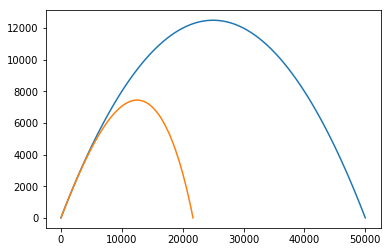

In [12]:
from scipy.integrate import ode
import numpy as np
import matplotlib.pyplot as plt

# ---------- FUNÇÕES -------------

# - Função Módulo

def modV(u,v,w):
    return (u**2+v**2+w**2)**0.5

# - Função de Estado

def deriv_ideal_2(t, xyzuvw,g,bm): 
    x, y, z, u, v, w = xyzuvw
  
    return [u,v,w,-bm*modV(u,v,w)*u,-bm*modV(u,v,w)*v , -g - bm*modV(u,v,w)*w]

# - Função resultado Análitica

def func_analitica(g, nintervalos,thet):
    vz0 = 700*np.cos(thet)
    vx0 = 700*np.sin(thet)
    T = (vz0 + np.sqrt(vz0**2 + 2 * g *0.1 ))/g
    t = np.linspace(0, T, nintervalos + 1)
    trajetoria = np.zeros((t.size, 3))
    trajetoria[:, 0] = vx0 * t
    trajetoria[:, 1] = np.zeros_like(t)
    trajetoria[:, 2] = 0.1 + vz0 * t - 0.5 * g * t**2
    
    return t, trajetoria

##################################################################
# ------- condições iniciais do programa -----------

t0 = 0
delta_t = 0.01
bm = 0.00004
g = 9.8
theta = np.pi/4
cond_iniciais = [0,0,0.1,700*np.sin(theta),0,700*np.cos(theta)]
list_angles = []
list_x = []

# -------------- Inicio -----------------
r = ode(deriv_ideal_2)
r.set_initial_value(cond_iniciais,t0)
r.set_f_params(g,bm)

list_tempos = [t0]
list_estados = [cond_iniciais]
last_z = 1
while(last_z > 0 and r.successful()):
    novo_t = r.t + delta_t
    list_tempos.append(novo_t)
    xyzuvw = r.integrate(novo_t)
    list_estados.append(xyzuvw)
    last_z = xyzuvw[2]
    lastx = xyzuvw[0]
    
list_estados = np.array(list_estados) 
xs1 = list_estados[:, 0]
ys1 = list_estados[:, 1]
zs1 = list_estados[:, 2]

# --------------- plot ----------------
t, trajetoria = func_analitica(9.8,100,np.pi/4)
plt.plot(trajetoria[:,0],trajetoria[:,2],label ='Analitica')
plt.plot(xs1,zs1,label = 'Experimental')
plt.plot()
plt.show()

### Trajetória de uma bala de canhão: Variação da densidade do ar

Você deve ter notado que o projétil chega a grandes altitudes antes de cair novamente no solo. Isso significa que existe a possibilidade de que variações na densidade do ar tenham efeitos importantes, principalmente considerando que o coeficiente $B$ depende da densidade do ar.

Para considerar isso, usaremos a aproximação adiabática para a densidade do ar (livro de Giordano e Nakanishi):

$$\rho = \rho_0 \left( 1 - \frac{a z}{T_0}\right)^\alpha,$$

onde $a \approx 6.5\cdot10^{-3}K/m$, $T_0$ é a temperatura ao nível do mar (em Kelvin), que faremos igual a 296.15, $\alpha\approx 2.5$ e $\rho_0$ é a densidade a nivel do mar (que é o nosso $z=0$). A resistência do ar é proporcional à densidade do ar, portanto para levar esse efeito em consideração basta substituirmos o módulo da resistência por:

$$\hat{R} = \frac{\rho}{\rho_0}R = \left( 1 - \frac{a z}{T_0}\right)^\alpha B v^2$$.

Faça as alterações necessárias nas equações, simule o sistema e compare os resultados tanto com o modelo sem variação de densidade do ar quanto com o modelo sem resistência do ar.

[]

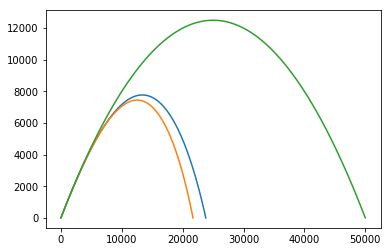

In [35]:
from scipy.integrate import ode
import numpy as np
import matplotlib.pyplot as plt

t0 = 0
delta_t = 0.01
bm = 0.00004
g = 9.8
a = 5.5*10**(-3)
alfa = 2.5
T_0 = 330
theta0 = np.pi / 4

list_angles = []
list_x = []

def modV(u,v,w):
    return (u**2+v**2+w**2)**0.5
def adiabatica(a,alfa,z,T_0):
    return (1-a*z/T_0)**alfa
def theta(theta0):
    return theta0
def deriv_ideal_2(t, xyzuvw,g,bm,a,alfa,T_0): 
    x, y, z, u, v, w = xyzuvw
   
    return [u,v,w,-bm*adiabatica(a,alfa,z,T_0)*modV(u,v,w)*u,-bm*adiabatica(a,alfa,z,T_0)*modV(u,v,w)*v , -g - bm*adiabatica(a,alfa,z,T_0)*modV(u,v,w)*w]



cond_iniciais = [0,0,0.1,700*np.sin(theta(theta0)),0,700*np.cos(theta(theta0))]
r = ode(deriv_ideal_2)
r.set_initial_value(cond_iniciais,t0)
r.set_f_params(g,bm,a,alfa,T_0)

list_tempos = [t0]
list_estados = [cond_iniciais]
last_z = 1

while(last_z > 0 and r.successful()):
    novo_t = r.t + delta_t
    list_tempos.append(novo_t)
    xyzuvw = r.integrate(novo_t)
    list_estados.append(xyzuvw)
    last_z = xyzuvw[2]
    lastx = xyzuvw[0]
    
list_estados = np.array(list_estados) # Converte para array para indexação
xs2 = list_estados[:, 0]
ys2 = list_estados[:, 1]
zs2 = list_estados[:, 2]
plt.plot(xs2,zs2)
plt.plot(xs1,zs1)
plt.plot(trajetoria[:,0],trajetoria[:,2],label ='Analitica')
plt.plot()

### Trajetória de uma bola de baseball

No livro de Giordano e Nakanishi, seção 2.3, existe uma discussão onde se mostra que o coeficiente de resistência do ar não é constante, mas depende da velocidade da bola, o que é importante considerando as velocidades típicas de bolas de baseball. Usaremos a expressão experimental da equação 2.6 desse livro, reproduzida abaixo, para calcular a trajetória da bola de baseball.

$$ \frac{B}{m} = 0.0039 + \frac{0.0058}{1 + \exp \left[(v - v_d)/\Delta\right]},$$

onde $v_d=35m/s$, $\Delta = 5m/s$ e tudo está em unidade SI.

Reescreva as equações para levar em conta esse efeito. Além disso:
- Despreze variações de densidade (pois a bola nunca sobe muito).
- Considere que a bola é lançada de $(0,0,1)$ com velocidade de $50 m/s$ e ângulo $\theta=35°$.
- Compare o resultado com o movimento no vácuo e com o movimento no ar mas desprezando a variação de $B/m$ (isto é, use o valor de $B/m$ para $v$ muito pequeno).

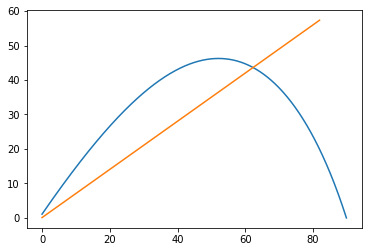

In [47]:
from scipy.integrate import ode
import numpy as np
import matplotlib.pyplot as plt
# - Função Módulo

def modV(u,v,w):
    return (u**2+v**2+w**2)**0.5

def bm(v_bm,vd,delta):
    return (3.9*10**(-3) + 5.8*10**(-3)/(1+np.exp((v_bm-vd)/delta)))

# - Função de Estado

def deriv_ideal_2(t, xyzuvw, g , bm , v_bm , vd , delta): 
    x, y, z, u, v, w = xyzuvw
  
    return [u,v,w,-bm(v_bm,vd,delta)*modV(u,v,w)*u,-bm(v_bm,vd,delta)*modV(u,v,w)*v , -g - bm(v_bm,vd,delta)*modV(u,v,w)*w]

##################################################################
# ------- condições iniciais do programa -----------

t0 = 0
delta_t = 0.01
g = 9.8
theta = 35*np.pi/180
v_bm = 10
vd = 35
delta = 5

cond_iniciais = [0,0,1,50*np.sin(theta),0,50*np.cos(theta)]

list_angles = []
list_x = []

# -------------- Inicio -----------------
r = ode(deriv_ideal_2)
r.set_initial_value(cond_iniciais,t0)
r.set_f_params(g,bm,v_bm,vd,delta)

list_tempos = [t0]
list_estados = [cond_iniciais]
last_z = 1

while(last_z > 0 and r.successful()):
    novo_t = r.t + delta_t
    list_tempos.append(novo_t)
    xyzuvw = r.integrate(novo_t)
    list_estados.append(xyzuvw)
    last_z = xyzuvw[2]
    lastx = xyzuvw[0]
    
list_estados = np.array(list_estados)
xs3 = list_estados[:, 0]
ys3 = list_estados[:, 1]
zs3 = list_estados[:, 2]

# ----- Solucao Analitica -----
times = np.linspace(0,2,100)
traj_analiticax = [50*np.cos(theta)*i for i in times]
traj_analiticaz = [50*np.sin(theta)*i for i in times]
traj_analiticax = np.array(traj_analiticax)
traj_analiticaz = np.array(traj_analiticaz)
# --------------- plot ----------------
#t, trajetoria = func_analitica(9.8,100,np.pi/4)
#plt.plot(trajetoria[:,0],trajetoria[:,2])
plt.plot(xs3,zs3)
#plt.plot(traj_Analitica[:,0],traj_Analitica[:,1])
plt.plot(traj_analiticax,traj_analiticaz)
plt.show()